In [9]:
import clustertools as ctools
import numpy as np
from galpy.orbit import Orbit

# Orbits and Tidal Tails

For cases where the external tidal field and a cluster's galactocentric position and velocity are known, it is possible to calculate additional cluster properties based on their orbit. As discussed in the documentation, this part of ``clustertools`` makes significant use of ``galpy`` (Bovy J., 2015, ApJS, 216, 29). In fact, several ``clustertools``  functions are simply wrappers of ``galpy`` functions that are setup to work with the ``StarCluster`` class.

To begin, lets load the final snapshot of an N-body simulation that was meant to reproduce the Galactic globular cluster Pal 5. Note one could have used ``setup_cluster`` to generate a Pal 5 - like cluster, but it would not have any tidal tails (which will also be discussed here).


0

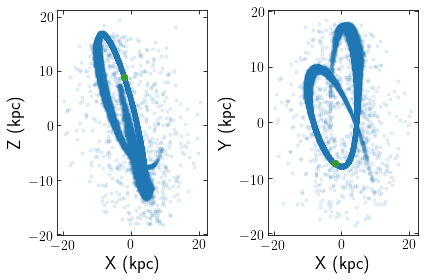

In [2]:
cluster = ctools.load_cluster('snapshot',filename='pal5.dat', units='kpckms',origin='galaxy')
ctools.starplot(cluster)

PAL5 default


0

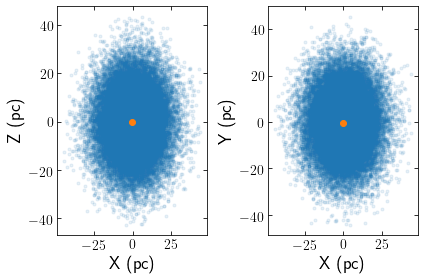

In [13]:
p5=ctools.setup_cluster('Pal5')
ctools.starplot(p5)